# Курсовая работа по дисциплине "Машинное обучение"
Выполнено Алапановой Эльзой, группы М8О-109СВ-24

---

## Датасет Airline Passenger Satisfaction

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

Импорт необходимых библиотек:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

Загрузка датасета:

In [2]:
df = pd.read_csv("train.csv")
df.head()

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       3              1   
1                                  2                       3              3   
2                                  2                       2              2   
3                                  5                       5              5   
4                                  3                       3              3   

   Food and drink  Online boarding  Seat comfort  Inflight entertainment  \
0               5                3             5                       5   
1               1                3             1                       1   
2               5                5             5                       5   
3               2                2             2                       2   
4               4                5             5                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied

Изучим датасет:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

* **103 904 строк × 25 столбцов** — датасет крупный, хватит и для обучения, и для валидации.
* Память ≈ 20 МБ, легко помещается в оперативке ноутбука.

Имеются пустые столбцы - поэтому сразу удаляем столбец `Unnamed: 0`.

Также имеем 20 числовых и 5 категориальных столбцов.

In [4]:
df.describe()

Unnamed: 0             id            Age  Flight Distance  \
count  103904.000000  103904.000000  103904.000000    103904.000000   
mean    51951.500000   64924.210502      39.379706      1189.448375   
std     29994.645522   37463.812252      15.114964       997.147281   
min         0.000000       1.000000       7.000000        31.000000   
25%     25975.750000   32533.750000      27.000000       414.000000   
50%     51951.500000   64856.500000      40.000000       843.000000   
75%     77927.250000   97368.250000      51.000000      1743.000000   
max    103903.000000  129880.000000      85.000000      4983.000000   

       Inflight wifi service  Departure/Arrival time convenient  \
count          103904.000000                      103904.000000   
mean                2.729683                           3.060296   
std                 1.327829                           1.525075   
min                 0.000000                           0.000000   
25%                 2.000000                           2.000000   
50%                 3.000000                           3.000000   
75%                 4.000000                           4.000000   
max                 5.000000                           5.000000   

       Ease of Online booking  Gate location  Food and drink  Online boarding  \
count           103904.000000  103904.000000   103904.000000    103904.000000   
mean                 2.756901       2.976883        3.202129         3.250375   
std                  1.398929       1.277621        1.329533         1.349509   
min                  0.000000       0.000000        0.000000         0.000000   
25%                  2.000000       2.000000        2.000000         2.000000   
50%                  3.000000       3.000000        3.000000         3.000000   
75%                  4.000000       4.000000        4.000000         4.000000   
max                  5.000000       5.000000        5.000000         5.000000   

        Seat comfort  Inflight entertainment  On-board service  \
count  103904.000000           103904.000000     103904.000000   
mean        3.439396                3.358158          3.382363   
std         1.319088                1.332991          1.288354   
min         0.000000                0.000000          0.000000   
25%         2.000000                2.000000          2.000000   
50%         4.000000                4.000000          4.000000   
75%         5.000000                4.000000          4.000000   
max         5.000000                5.000000          5.000000   

       Leg room service  Baggage handling  Checkin service  Inflight service  \
count     103904.000000     103904.000000    103904.000000     103904.000000   
mean           3.351055          3.631833         3.304290          3.640428   
std            1.315605          1.180903         1.265396          1.175663   
min            0.000000          1.000000         0.000000          0.000000   
25%            2.000000          3.000000         3.000000          3.000000   
50%            4.000000          4.000000         3.000000          4.000000   
75%            4.000000          5.000000         4.000000          5.000000   
max            5.000000          5.000000         5.000000          5.000000   

         Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  
count  103904.000000               103904.000000             103594.000000  
mean        3.286351                   14.815618                 15.178678  
std         1.312273                   38.230901                 38.698682  
min         0.000000                    0.000000                  0.000000  
25%         2.000000                    0.000000                  0.000000  
50%         3.000000                    0.000000                  0.000000  
75%         4.000000                   12.000000                 13.000000  
max         5.000000                 1592.000000               1584.000000

In [5]:
df.describe(include='object')

Gender   Customer Type   Type of Travel     Class  \
count   103904          103904           103904    103904   
unique       2               2                2         3   
top     Female  Loyal Customer  Business travel  Business   
freq     52727           84923            71655     49665   

                   satisfaction  
count                    103904  
unique                        2  
top     neutral or dissatisfied  
freq                      58879

### Займемся очисткой данной и их подготовкой:

In [6]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
df.set_index('id', inplace=True)

Ищем незаполненные ячейки:

In [8]:
df.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [9]:
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(exclude='object').columns
display(categorical_cols)
display(numerical_cols)

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

<Axes: xlabel='Departure Delay in Minutes', ylabel='Arrival Delay in Minutes'>

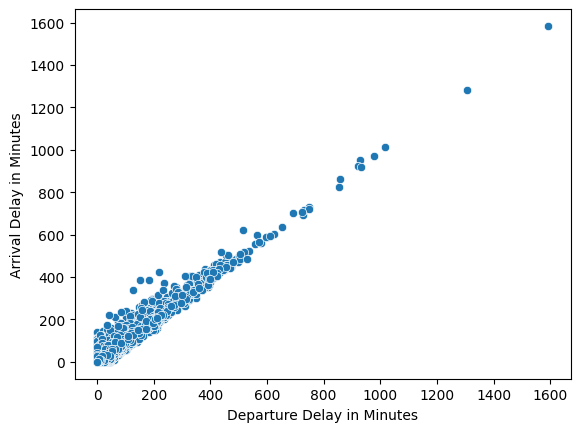

In [10]:
sns.scatterplot(x='Departure Delay in Minutes', y='Arrival Delay in Minutes', data=df)

In [11]:
corr = df[numerical_cols].corr()
# смотрим топ-5 пары числовых признаков, которые сильнее всего коррелируют между собой
corr.unstack().sort_values(ascending=False).drop_duplicates().head(10)

Arrival Delay in Minutes  Arrival Delay in Minutes      1.000000
                          Departure Delay in Minutes    0.965481
Inflight wifi service     Ease of Online booking        0.715856
Inflight entertainment    Cleanliness                   0.691815
Cleanliness               Seat comfort                  0.678534
Food and drink            Cleanliness                   0.657760
Baggage handling          Inflight service              0.628561
Food and drink            Inflight entertainment        0.622512
Seat comfort              Inflight entertainment        0.610590
Food and drink            Seat comfort                  0.574556
dtype: float64

Как можно увидеть задержка прибытия очень сильно коррелирует с задержкой вылета, поэтому лучше просто удалить этот столбец, потому что его сохранение может привести к переобучению

In [12]:
df.drop(['Arrival Delay in Minutes'], axis=1, inplace=True)
df.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
satisfaction                         0
dtype: int64

In [13]:
# Ищем незаполненные ячейки и удаляем строки с NaN
df.dropna(inplace=True)

In [14]:
df.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
satisfaction                         0
dtype: int64

### Разведочный анализ данных (EDA)

<Axes: >

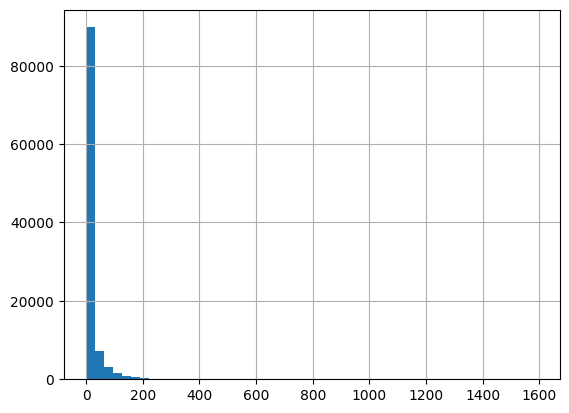

In [15]:
df['Departure Delay in Minutes'].hist(bins=50)

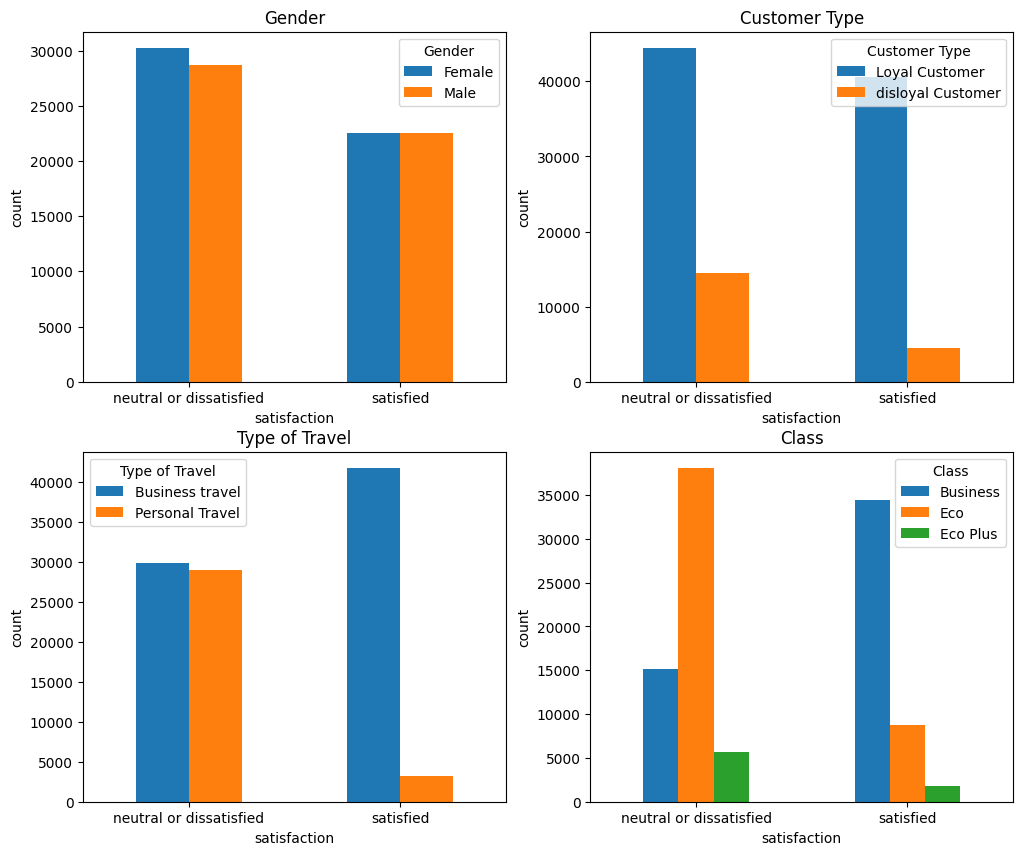

In [16]:
ax,fig = plt.subplots(figsize=(12, 10), nrows=2, ncols=2)
# set x tickes rotation to 40

for i, col in enumerate(categorical_cols):
    if col != 'satisfaction':
      df.groupby("satisfaction")[col].value_counts().unstack().plot(kind='bar', ax=fig.flatten()[i])
      fig.flatten()[i].set_xticklabels(fig.flatten()[i].get_xticklabels(), rotation=0)
      fig.flatten()[i].set_title(col)
      fig.flatten()[i].set_ylabel('count')

В данных присутствует множество выбросов, но в этих столбцах выбросы могут указывать на проблемы, вызывающие недовольство пассажиров. Поэтому, вместо того чтобы терять эти записи, буду использовать масштабирование, устойчивое к выбросам

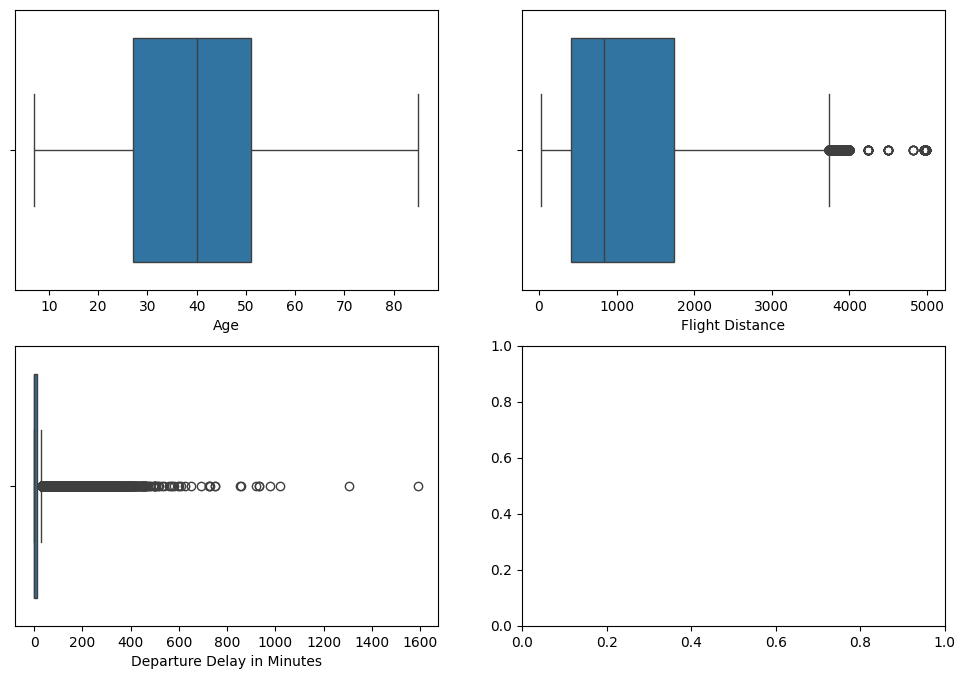

In [17]:
# Выбираем числовые столбцы (исключая категориальные — 'object')
numerical_cols = df.select_dtypes(exclude='object').columns

# Находим только те числовые столбцы, в которых значения могут превышать 5
# (т.е. это не рейтинговые оценки от 1 до 5, а, например, время задержки, расстояние и т.п.)
high_values = [col for col in numerical_cols if df[col].max() > 5]

# Создаём несколько boxplot-графиков для этих «высокодиапазонных» признаков
ax, fig = plt.subplots(figsize=(12, 8), nrows=2, ncols=2)
for i, col in enumerate(high_values):
    sns.boxplot(data=df, x=col, ax=fig.flatten()[i])

Считаем корреляцию

In [18]:
df_encoded = df.copy()
df_encoded['satisfaction'] = df_encoded['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1}).astype(int)


In [19]:
df_encoded['Class'] = df_encoded['Class'].map({'Business': 2, 'Eco Plus': 1, 'Eco': 0}).astype(int)

In [20]:
df_encoded["Type of Travel"].value_counts()

Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64

In [21]:
df_encoded['Customer Type'].value_counts()

Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64

In [22]:
df_encoded['Type of Travel'] = df_encoded['Type of Travel'].map({'Personal Travel': 0, 'Business travel': 1}).astype(int)
df_encoded['Customer Type'] = df_encoded['Customer Type'].map({'Loyal Customer': 0, 'disloyal Customer': 1}).astype(int)
df_encoded['Gender'] = df_encoded['Gender'].map({'Female': 0, 'Male': 1}).astype(int)
df_encoded.head()

Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
id                                                                           
70172        1              0   13               0      1              460   
5047         1              1   25               1      2              235   
110028       0              0   26               1      2             1142   
24026        0              0   25               1      2              562   
119299       1              0   61               1      2              214   

        Inflight wifi service  Departure/Arrival time convenient  \
id                                                                 
70172                       3                                  4   
5047                        3                                  2   
110028                      2                                  2   
24026                       2                                  5   
119299                      3                                  3   

        Ease of Online booking  Gate location  Food and drink  \
id                                                              
70172                        3              1               5   
5047                         3              3               1   
110028                       2              2               5   
24026                        5              5               2   
119299                       3              3               4   

        Online boarding  Seat comfort  Inflight entertainment  \
id                                                              
70172                 3             5                       5   
5047                  3             1                       1   
110028                5             5                       5   
24026                 2             2                       2   
119299                5             5                       3   

        On-board service  Leg room service  Baggage handling  Checkin service  \
id                                                                              
70172                  4                 3                 4                4   
5047                   1                 5                 3                1   
110028                 4                 3                 4                4   
24026                  2                 5                 3                1   
119299                 3                 4                 4                3   

        Inflight service  Cleanliness  Departure Delay in Minutes  \
id                                                                  
70172                  5            5                          25   
5047                   4            1                           1   
110028                 4            5                           0   
24026                  4            2                          11   
119299                 3            3                           0   

        satisfaction  
id                    
70172              0  
5047               0  
110028             1  
24026              0  
119299             1

Проверяем насколько числовые признаки коррелируют с целевой переменной - которая стала категориальной

In [23]:
from scipy.stats import spearmanr
numerical_cols = df.select_dtypes(exclude='object').columns
for col in numerical_cols:
    if(col != 'Age'):
      correlation, p_value = spearmanr(df_encoded[col], df_encoded['satisfaction'])
      print(f'{col} Correlation: {correlation}, p-value: {p_value}')

Flight Distance Correlation: 0.25727363714534873, p-value: 0.0
Inflight wifi service Correlation: 0.28745768595361976, p-value: 0.0
Departure/Arrival time convenient Correlation: -0.04957577388506957, p-value: 1.5011360099772508e-57
Ease of Online booking Correlation: 0.17712102600338328, p-value: 0.0
Gate location Correlation: -0.00013743721249870542, p-value: 0.9646643347719387
Food and drink Correlation: 0.20723703075508718, p-value: 0.0
Online boarding Correlation: 0.5509941721149278, p-value: 0.0
Seat comfort Correlation: 0.3621988225053237, p-value: 0.0
Inflight entertainment Correlation: 0.3995042212459363, p-value: 0.0
On-board service Correlation: 0.32830121417107366, p-value: 0.0
Leg room service Correlation: 0.31834330197439037, p-value: 0.0
Baggage handling Correlation: 0.2693177361355548, p-value: 0.0
Checkin service Correlation: 0.23260252340995669, p-value: 0.0
Inflight service Correlation: 0.26536212642017604, p-value: 0.0
Cleanliness Correlation: 0.3034294777948738, p-

Онлайн регистрация - самая высокая корреляция, значит, что это самый сильный положительный фактор.

In [24]:
from scipy.stats import chi2_contingency

categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    contingency_table = pd.crosstab(df_encoded[col], df_encoded['satisfaction'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
    print(f"{col} Cramer's V: {cramers_v:.3f}, p-value: {p:.3f}")

Gender Cramer's V: 0.012, p-value: 0.000
Customer Type Cramer's V: 0.188, p-value: 0.000
Type of Travel Cramer's V: 0.449, p-value: 0.000
Class Cramer's V: 0.505, p-value: 0.000
satisfaction Cramer's V: 1.000, p-value: 0.000


Этот код анализирует, насколько сильно категориальные признаки связаны с целевой переменной `satisfaction` (удовлетворён/неудовлетворён), используя:

- хи-квадрат тест независимости (chi2_contingency)

- меру Крамера V (Cramér's V) — показывает силу связи между двумя категориальными переменными.


**Вывод результатов:**

* **Gender**: почти не влияет на удовлетворённость, можно исключить как слабый признак.
* **Customer Type**: оказывает некоторый эффект — лояльные клиенты чаще довольны.
* **Type of Travel**: важный фактор — путешествие по работе/по личным делам сильно влияет.
* **Class**: самый сильный предиктор — класс обслуживания напрямую влияет на удовлетворение.
* **satisfaction**: сравнение с самой собой (V = 1.0) — это контрольная строка, не нужна в анализе.


Выбор параметров и преобразование данных:

In [25]:
df_encoded.drop(['Gender', 'Gate location'], axis=1, inplace=True)

In [26]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
qtranformer = QuantileTransformer(output_distribution='normal')
df_encoded[["Departure Delay in Minutes", "Flight Distance"]] = qtranformer.fit_transform(df_encoded[["Departure Delay in Minutes", "Flight Distance"]])
numerical_cols = df.select_dtypes(exclude='object').columns
numerical_cols = numerical_cols.drop(['Departure Delay in Minutes', 'Flight Distance', 'Gate location'])
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

In [27]:
df_encoded.head()

Customer Type       Age  Type of Travel  Class  Flight Distance  \
id                                                                        
70172               0 -1.745279               0      1        -0.555462   
5047                1 -0.951360               1      2        -1.286702   
110028              0 -0.885200               1      2         0.330873   
24026               0 -0.951360               1      2        -0.387078   
119299              0  1.430397               1      2        -1.407905   

        Inflight wifi service  Departure/Arrival time convenient  \
id                                                                 
70172                0.203579                           0.616172   
5047                 0.203579                          -0.695245   
110028              -0.549533                          -0.695245   
24026               -0.549533                           1.271880   
119299               0.203579                          -0.039537   

        Ease of Online booking  Food and drink  Online boarding  Seat comfort  \
id                                                                              
70172                 0.173776        1.352264        -0.185532      1.183099   
5047                  0.173776       -1.656326        -0.185532     -1.849315   
110028               -0.541060        1.352264         1.296496      1.183099   
24026                 1.603448       -0.904178        -0.926545     -1.091211   
119299                0.173776        0.600117         1.296496      1.183099   

        Inflight entertainment  On-board service  Leg room service  \
id                                                                   
70172                 1.231704          0.479403          -0.26684   
5047                 -1.769081         -1.849161           1.25338   
110028                1.231704          0.479403          -0.26684   
24026                -1.018885         -1.072973           1.25338   
119299               -0.268688         -0.296785           0.49327   

        Baggage handling  Checkin service  Inflight service  Cleanliness  \
id                                                                         
70172           0.311769         0.549799          1.156436     1.305870   
5047           -0.535045        -1.821012          0.305848    -1.742292   
110028          0.311769         0.549799          0.305848     1.305870   
24026          -0.535045        -1.821012          0.305848    -0.980251   
119299          0.311769        -0.240472         -0.544740    -0.218211   

        Departure Delay in Minutes  satisfaction  
id                                                
70172                     0.985610             0  
5047                      0.217488             0  
110028                   -5.199338             1  
24026                     0.642543             0  
119299                   -5.199338             1

## Обучение модели

In [28]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import time

# Разделение признаков и целевой переменной
X = df_encoded.drop('satisfaction', axis=1)
y = df_encoded['satisfaction']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация модели
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Сетка параметров
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Настройка поиска
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           cv=5, scoring='accuracy', verbose=1)

# Засекаем время
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Лучшая модель
best_model = grid_search.best_estimator_

# Предсказание
y_pred = best_model.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)

# Вывод результатов
print("Обучение завершено за {:.2f} секунд".format(end_time - start_time))
print("Лучшая комбинация параметров:", grid_search.best_params_)
print("Accuracy на тестовой выборке: {:.4f}".format(accuracy))


Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:45:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:45:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:45:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:45:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:45:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Обучение завершено за 112.28 секунд
Лучшая комбинация параметров: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Accuracy на тестовой выборке: 0.9629


In [29]:
# отчет о классификации модели
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11713
           1       0.97      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



Пояснение по строкам:

| Показатель    | Значение                                                                                                                       |
| ------------- | ------------------------------------------------------------------------------------------------------------------------------ |
| **precision** | Точность — доля правильных положительных предсказаний среди всех положительных предсказаний (важна при ограниченных ресурсах). |
| **recall**    | Полнота — доля правильно найденных положительных объектов среди всех фактически положительных.                                 |
| **f1-score**  | Гармоническое среднее между precision и recall. Хорошая сводная метрика.                                                       |
| **support**   | Количество объектов класса в выборке.                                                      |



**Общие метрики:**

* **accuracy**: 96% — доля всех верных предсказаний от общего числа.
* **macro avg**: среднее по классам, **без учёта их количества** (равновесная оценка).
* **weighted avg**: средневзвешенное по количеству примеров каждого класса (учитывает дисбаланс классов, если он есть).

## Сравним SHAP и LIME

In [30]:
import shap

# Создание explainer'а
explainer = shap.Explainer(best_model, X_train, feature_names=X_train.columns)

# Вычисление значений SHAP
shap_values = explainer(X_test)

100%|===================| 20768/20781 [04:07<00:00]       

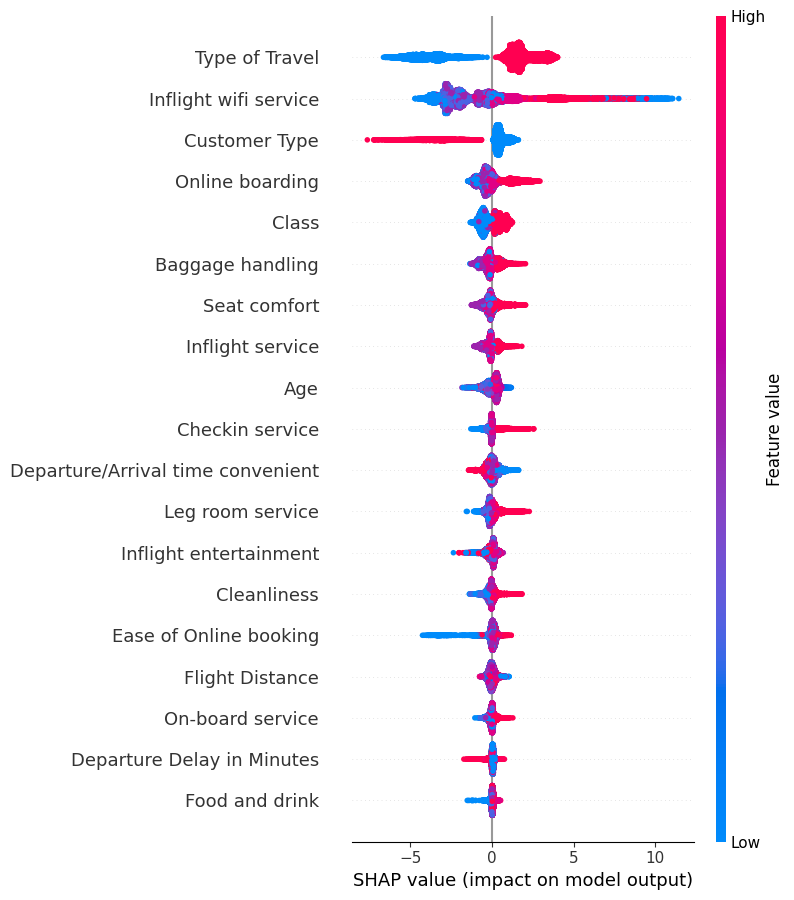

In [31]:
# Общее summary-график (важность признаков)
shap.summary_plot(shap_values, X_test)

**Что показывает график**

* **По вертикали (ось Y)** — признаки, отсортированные по **среднему влиянию** на модель (самые важные — сверху).
* **По горизонтали (ось X)** — **SHAP value**, то есть насколько сильно данный признак влияет на предсказание (влево — уменьшает вероятность положительного класса, вправо — увеличивает).
* **Цвет** — значение признака (🔵 — низкое, 🔴 — высокое).

`Type of Travel` - Очень высокое (Бизнес-путешественники более удовлетворены) (высокие значения — вправо).

`Inflight wifi service` - Высокое.

`Customer Type` - Высокое (Постоянные клиенты (high value) чаще удовлетворены).

`Online boarding` - Высокое.

`Class` - Значимое (Бизнес-класс положительно влияет на удовлетворённость).

`Baggage handling`, `Checkin service`, `Inflight service` — тоже вносят вклад, но чуть меньше.


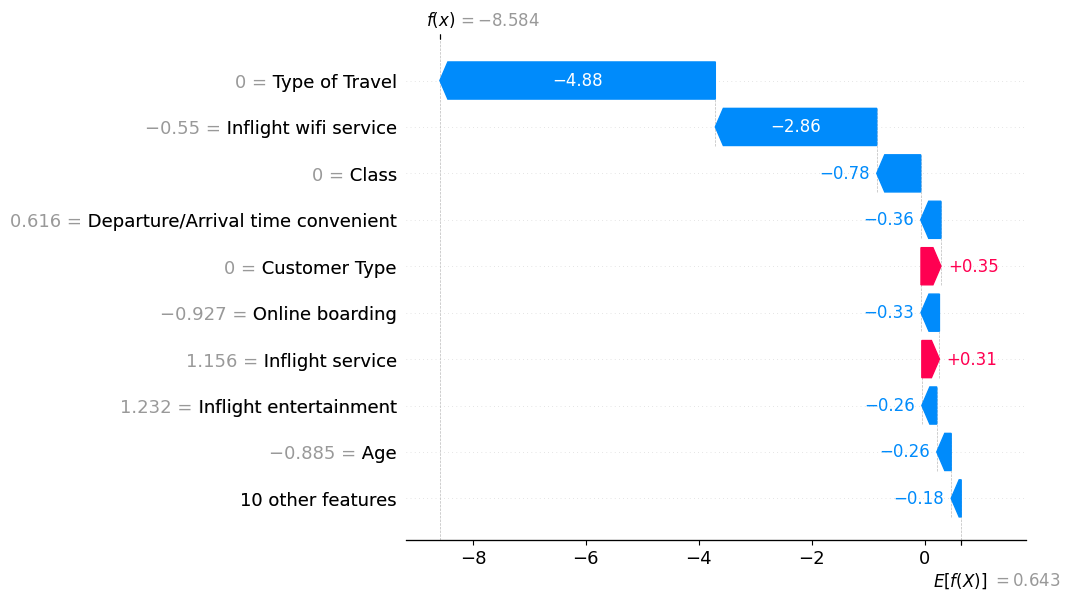

In [32]:
# Индивидуальное объяснение для одного объекта (например, первого)
shap.plots.waterfall(shap_values[0])

In [33]:
shap_values[0]

.values =
array([ 0.35342349, -0.25522855, -4.87572887, -0.77838396, -0.13414493,
       -2.85718945, -0.35801683,  0.02826643, -0.03706595, -0.32664866,
        0.05225101, -0.26418511, -0.0596349 , -0.00681128, -0.07367717,
       -0.01920142,  0.31154037,  0.10801562, -0.03526114])

.base_values =
np.float64(0.6433975186446395)

.data =
array([ 0.        , -0.88520032,  0.        ,  0.        ,  0.02258416,
       -0.54953343,  0.6161719 , -0.54105962,  1.35226441, -0.92654544,
        1.18309931,  1.23170428,  1.25559028,  0.49327001,  0.31176855,
       -0.24047176,  1.15643582,  1.30586973, -5.19933758])

In [34]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=327d62ea93140133b0a6768a8cd54301fc8e2f3df8e12aebed26d5cac1f87d82
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [35]:
import lime
import lime.lime_tabular
import numpy as np

# LIME работает с numpy, а не pandas
X_train_np = X_train.values
X_test_np = X_test.values

In [36]:
# Создание explainer'а
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_np,
    feature_names=X_train.columns.tolist(),
    class_names=['dissatisfied', 'satisfied'],
    mode='classification'
)

In [37]:
# Выбор наблюдения для объяснения
i = 0  # например, первое из тестовой выборки
exp = lime_explainer.explain_instance(X_test_np[i], best_model.predict_proba, num_features=10)

# Отобразить в ноутбуке
exp.show_in_notebook(show_all=False)

## Пример моего предсказания

In [38]:
df_encoded.columns

Index(['Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Food and drink', 'Online boarding',
       'Seat comfort', 'Inflight entertainment', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Inflight service', 'Cleanliness', 'Departure Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [39]:
new_data = {
    'Customer Type': 'Loyal Customer',
    'Age': 22,
    'Type of Travel': 'Personal Travel',
    'Class': 'Eco',
    'Flight Distance': 1300,
    'Inflight wifi service': 2,
    'Departure/Arrival time convenient': 3,
    'Ease of Online booking': 4,
    'Food and drink': 3,
    'Online boarding': 4,
    'Seat comfort': 3,
    'Inflight entertainment': 4,
    'On-board service': 4,
    'Leg room service': 4,
    'Baggage handling': 4,
    'Checkin service': 4,
    'Inflight service': 4,
    'Cleanliness': 4,
    'Departure Delay in Minutes': 15
}


In [40]:
new_df = pd.DataFrame([new_data])

In [41]:
# Сначала преобразуем два признака через QuantileTransformer
new_df[["Departure Delay in Minutes", "Flight Distance"]] = qtranformer.transform(new_df[["Departure Delay in Minutes", "Flight Distance"]])

# Теперь нормализуем остальные числовые (те, которые были масштабированы scaler’ом)
new_df[numerical_cols] = scaler.transform(new_df[numerical_cols])

In [42]:
# One-hot кодируем так же, как раньше
new_df_encoded = pd.get_dummies(new_df)

# Убедимся, что порядок и состав колонок совпадает с обучающей выборкой
missing_cols = set(X.columns) - set(new_df_encoded.columns)
for col in missing_cols:
    new_df_encoded[col] = 0  # добавим недостающие, заполним нулями

# Упорядочим столбцы в том же порядке
new_df_encoded = new_df_encoded[X.columns]


In [43]:
prediction = best_model.predict(new_df_encoded)

print("Буду довольна полётом" if prediction[0] == 1 else "Буду недовольна полётом")

Буду недовольна полётом


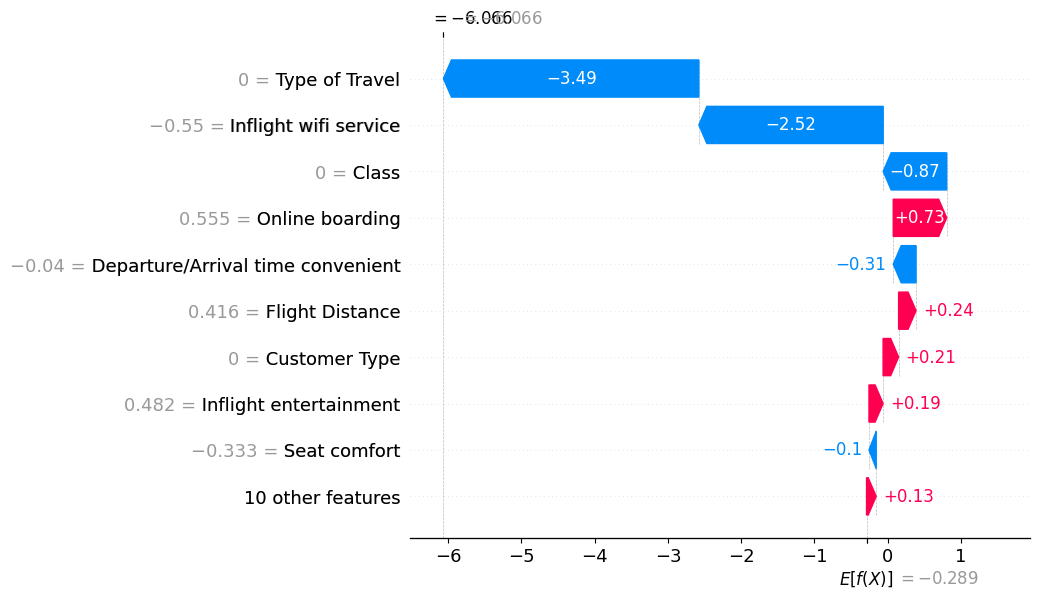

In [44]:

# Создаем explainer для XGBoost модели
explainer = shap.Explainer(best_model)

# Получаем SHAP значения для нового примера
shap_values = explainer(new_df_encoded)

# Визуализируем влияние признаков на предсказание для этого примера
shap.plots.waterfall(shap_values[0])


Я построила **SHAP waterfall plot** для одного пассажира на основе указанных признаков — это визуализация объяснения решения модели на индивидуальном уровне.


#### Общий прогноз:

* **SHAP предсказание сильно отрицательное** (около **−6**), что означает, что **модель предсказала неудовлетворённость клиента полётом** с большой уверенностью.

#### Основные причины неудовлетворённости (вклад в минус):

| Признак                 | SHAP значение | Комментарий                                                       |
| ----------------------- | ------------- | ----------------------------------------------------------------- |
| `Type of Travel`        | −3.49         | Путешествие — **личное**, а не деловое → чаще менее довольны.     |
| `Inflight wifi service` | −2.52         | Оценка Wi-Fi **низкая (2)** → сильное снижение удовлетворённости. |
| `Class`                 | −0.87         | Класс — **эконом** → отрицательный вклад.                         |

#### Смягчающие факторы (вклад в плюс):

| Признак                  | SHAP значение | Комментарий                                                       |
| ------------------------ | ------------- | ----------------------------------------------------------------- |
| `Online boarding`        | +0.73         | Хорошо оценён (4) → позитивный эффект.                            |
| `Flight Distance`        | +0.24         | Дальние перелёты могут быть связаны с более положительным опытом. |
| `Inflight entertainment` | +0.19         | Высокая оценка → увеличивает удовлетворённость.                   |

---

### Итог:

Несмотря на хорошие оценки многих сервисов (еда, развлечение, посадка), **два ключевых признака — тип поездки (личная) и слабый Wi-Fi — существенно ухудшили общий прогноз**, что привело к предсказанию "неудовлетворён".


In [45]:
# Создаем explainer с обучающей выборкой (только признаки)
feature_names = X.columns.tolist()

lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=feature_names,
    class_names=['Недовольна', 'Довольна'],
    mode='classification'
)

# Объясняем предсказание для нового примера
exp = lime_explainer.explain_instance(
    data_row=new_df_encoded.iloc[0].values,
    predict_fn=best_model.predict_proba
)

# Печатаем текстовое объяснение с вкладами признаков
print(exp.as_list())

# Если в Jupyter, можно вывести визуализацию так:
exp.show_in_notebook(show_table=True)


[('Type of Travel <= 0.00', -0.4109209654315238), ('Customer Type <= 0.00', 0.31456819681959713), ('-0.54 < Baggage handling <= 0.31', -0.07170126038751377), ('-1.09 < Seat comfort <= 0.42', -0.06505733703092521), ('0.17 < Ease of Online booking <= 0.89', 0.06384589769192184), ('Inflight wifi service <= -0.55', -0.049341914377264845), ('-0.54 < Inflight service <= 0.31', -0.041300252048533014), ('-1.07 < On-board service <= 0.48', -0.03309704549797861), ('-1.02 < Inflight entertainment <= 0.48', 0.025548794358793706), ('-0.24 < Checkin service <= 0.55', -0.022730818572946343)]


### вывод по LIME (локальной интерпретации):

#### Общий результат:

* Модель предсказала: **"Недовольна"** (вероятность 1.00, то есть 100%).
* Значит, несмотря на наличие положительных факторов, их **не хватило**, чтобы изменить прогноз.

---

### Основные признаки, повлиявшие на прогноз **"Недовольна"**:

| Признак                         | Вклад (отрицательный) | Комментарий                                                                     |
| ------------------------------- | --------------------- | ------------------------------------------------------------------------------- |
| `Type of Travel = 0.00`         | 0.41                  | Вероятно, это **личная поездка** → связано с большей вероятностью недовольства. |
| `Seat comfort = -0.33`          | 0.07                  | Средняя или низкая оценка комфорта сидений.                                     |
| `Inflight wifi service = -0.55` | 0.05                  | Плохой Wi-Fi.                                                                   |
| `Inflight service = 0.31`       | 0.04                  | Видимо, всё ещё ниже некоторого порога.                                         |
| `On-board service = 0.48`       | 0.03                  | Аналогично — положительно, но недостаточно.                                     |
| `Checkin service = 0.55`        | 0.02                  | Хорошая оценка, но маленький вклад.                                             |

---

### Положительные признаки (в пользу "Довольна"):

| Признак                         | Вклад (положительный) | Комментарий                      |
| ------------------------------- | --------------------- | -------------------------------- |
| `Customer Type = 0.00`          | 0.31                  | Вероятно, **лояльный клиент**.   |
| `Ease of Online booking = 0.89` | 0.06                  | Очень высоко оценена.            |
| `Inflight entertainment = 0.48` | 0.03                  | Хорошая развлекательная система. |

---

### Вывод:

Модель считает пассажирку (меня) **недовольной** несмотря на хорошие оценки некоторых сервисов, так как решающими факторами стали:

* Тип поездки (личная),
* Плохой Wi-Fi,
* Низкий комфорт кресел.

Эти выводы **согласуются с SHAP**, где такие же признаки также вели к отрицательному прогнозу.

По результатам интерпретации модели с помощью методов SHAP и LIME можно сделать следующий вывод: модель предсказала, что пассажир **недоволен перелётом**. Ключевыми факторами, повлиявшими на это решение, стали тип поездки (личная), низкая оценка за inflight wifi service и умеренный комфорт кресел — все эти признаки дали значительный отрицательный вклад. Несмотря на наличие положительных факторов, таких как высокая оценка удобства онлайн-бронирования, inflight entertainment и принадлежность к лояльным клиентам, их влияние оказалось недостаточным для изменения итогового прогноза. Оба метода объяснения (SHAP и LIME) пришли к **согласованному выводу**, подтвердив значимость одних и тех же признаков в принятии решения моделью.
